# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)
html=browser.html


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
weather_soup=soup(html, 'html.parser')
weather_soup

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<main>
<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>

In [15]:
# Extract all rows of data (take out commented code?)
#weather_table = weather_soup.find('table', class_='table')
rows_table = weather_table.find_all('tr', class_='data-row')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [16]:
# Create an empty list
row_list=[]

# Loop through the scraped data to create a list of rows
for row in rows_table:
    data = row.find_all('td')
    row_data = [td.text.strip() for td in data]
    row_list.append(row_data)
row_list

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [27]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_weather_df=pd.DataFrame(row_list, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'],)

In [28]:
# Confirm DataFrame was created successfully
mars_weather_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [29]:
# Examine data type of each column
mars_weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [30]:
# Change data types for data analysis
mars_weather_df['id']=mars_weather_df['id'].astype(int)
mars_weather_df['terrestrial_date']=pd.to_datetime(mars_weather_df['terrestrial_date'])
mars_weather_df['sol']=mars_weather_df['sol'].astype(int)
mars_weather_df['ls']=mars_weather_df['ls'].astype(int)
mars_weather_df['month']=mars_weather_df['month'].astype(int)
mars_weather_df['min_temp']=mars_weather_df['min_temp'].astype(float)
mars_weather_df['pressure']=mars_weather_df['pressure'].astype(float)


In [31]:
# Confirm type changes were successful by examining data types again
mars_weather_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [33]:
# 1. How many months are there on Mars?
mars_mo=mars_weather_df['month'].nunique()
print("Number of unique months on Mars:", mars_mo)

Number of unique months on Mars: 12


In [36]:
# 2. How many Martian days' worth of data are there?
sol_days=mars_weather_df['sol'].nunique()
print("Martian Days (Sols) of Data:", sol_days)

Martian Days (Sols) of Data: 1867


In [40]:
# 3. What is the average low temperature by month?
mars_mt_avg=mars_weather_df.groupby('month')['min_temp'].mean()
print("Average low temperature (°C) by month on Mars:", mars_mt_avg)

Average low temperature (°C) by month on Mars: month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


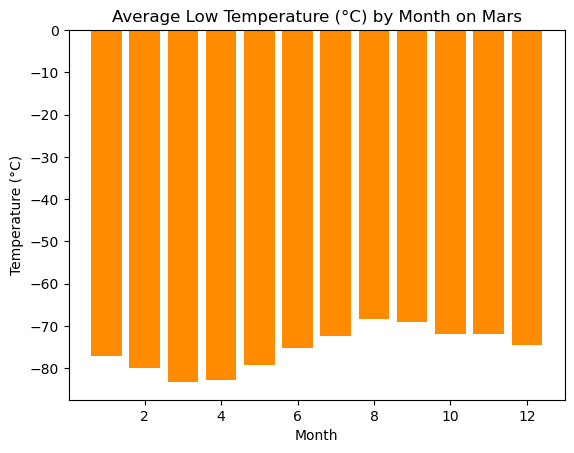

In [123]:
# Plot the average temperature by month
plt.bar(mars_mt_avg.index, mars_mt_avg.values, color='darkorange')

# set title and labels
plt.title('Average Low Temperature (°C) by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.savefig("Output/avglowtemp.png")

# display chart
plt.show()


In [43]:
# Identify the coldest and hottest months in Curiosity's location
coldest_month=mars_mt_avg.idxmin()
hottest_month=mars_mt_avg.idxmax()

# Create a df to show results
hot_cold_df=pd.DataFrame({'Month': [coldest_month, hottest_month], 'Temperature(°C)': [mars_mt_avg[coldest_month], mars_mt_avg[hottest_month]]})

hot_cold_df



,Month,Temperature(°C)
0,3,-83.307292
1,8,-68.382979


In [44]:
# 4. Average pressure by Martian month
mars_pressure_avg=mars_weather_df.groupby('month')['pressure'].mean()
print("Average pressure by month on Mars:", mars_pressure_avg)

Average pressure by month on Mars: month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


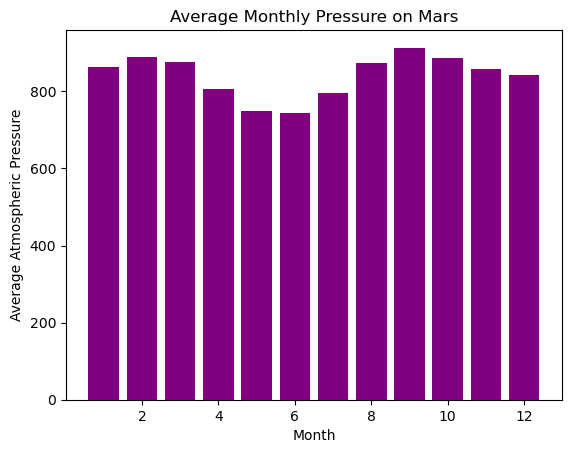

In [122]:
# Plot the average pressure by month
plt.bar(mars_pressure_avg.index, mars_pressure_avg.values, color='purple')

# title and labels
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure')
plt.title('Average Monthly Pressure on Mars')
plt.savefig("Output/avgmnthpressure.png")


# display 
plt.show()

In [93]:
# 5. How many terrestrial (earth) days are there in a Martian year?

## When the solar longitude (ls) is 0 degrees, it means that Mars has completed one full orbit 
# around the Sun(AKA: one Martian year has passed).

## Calculate number of earth days in a martian year by finding the time difference (using .diff) between 
# two dates where solar longitude (ls)=0 .
from datetime import datetime as dt

ls_zero=mars_weather_df[mars_weather_df['ls']==0]
# sort by earth date time stamp 
ls_zero=ls_zero.sort_values('terrestrial_date')
# get the number of earth days between each date where ls=0
time_diff=ls_zero.diff()
time_diff

,id,terrestrial_date,sol,ls,month,min_temp,pressure
304,NaN,NaT,NaN,NaN,NaN,NaN,NaN
305,-1.0,1 days,1.0,0.0,0.0,-2.0,1.0
925,635.0,686 days,667.0,0.0,0.0,-4.0,-5.0
926,-16.0,1 days,1.0,0.0,0.0,18.0,-17.0
1579,668.0,686 days,668.0,0.0,0.0,-13.0,8.0
1580,4.0,1 days,1.0,0.0,0.0,1.0,0.0


In [102]:
## 5. How many terrestrial (earth) days are there in a Martian year? (pick max date from terrestrial date column
# in dataframe above)
terdays_in_martianyr=time_diff['terrestrial_date'].max()


print("There are approximately",terdays_in_martianyr, "Terrestrial days in a Martian year.")


There are approximately 686 days 00:00:00 Terrestrial days in a Martian year.


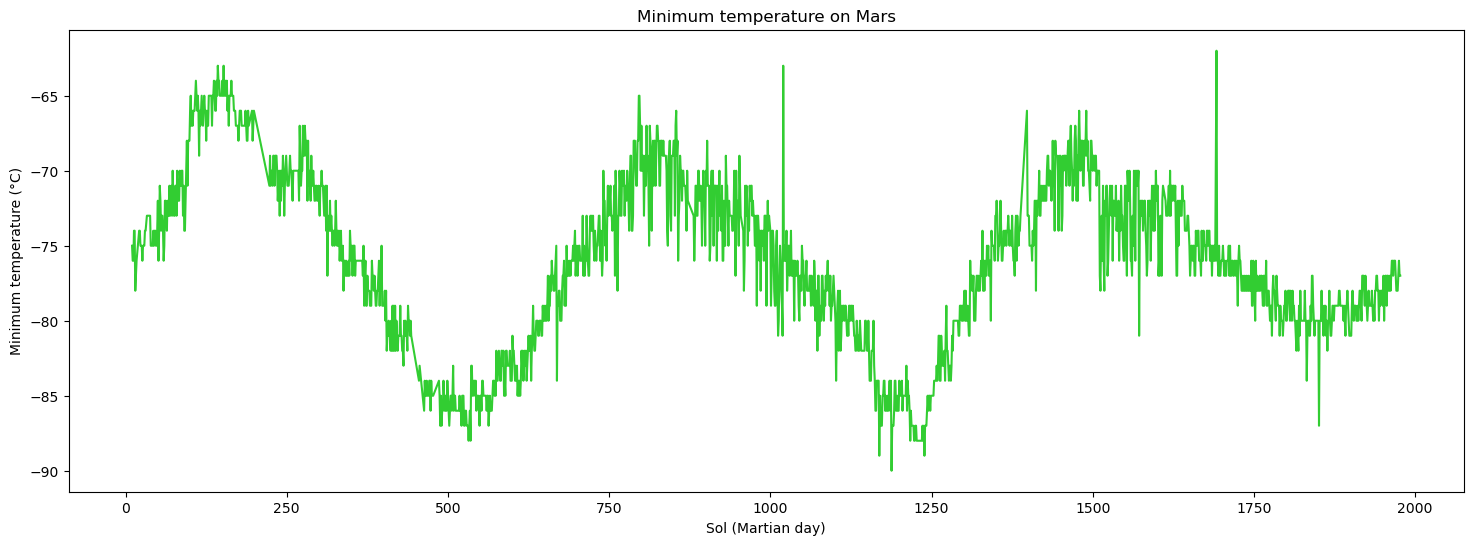

In [121]:
# Visually estimate the result by plotting the daily (martian daily) minimum temperature.
plt.figure(figsize=(18,6))

plt.plot(mars_weather_df['sol'], mars_weather_df['min_temp'], color='limegreen')

# Set the plot title and axis labels
plt.title("Minimum temperature on Mars")
plt.xlabel("Sol (Martian day)")
plt.ylabel("Minimum temperature (°C)")
plt.savefig("Output/mintempmars.png")

# Show the plot
plt.show()


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [125]:
# Write the data to a CSV
mars_weather_df.to_csv('Output/mars_weather.csv', index=False)

In [57]:
browser.quit()